In [1]:
import sys
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
label_size = 24
matplotlib.rc('font', size=label_size) 

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle

from astropy.io import ascii, fits
from astropy.table import Table


import warnings
warnings.filterwarnings("once")

In [58]:

hdus = fits.open("/Users/xwou/Documents/Research/MIT/spectro_photo_parallax_DR17/spec_download_norm/data/spectra/apStar-dr17-2M00001493+5534446.fits")
header = hdus[0].header
data = hdus[1].data
noise = hdus[2].data
bitmask = hdus[3].data
hdus.close()

In [59]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CRVAL1  =                4.179 / Start log10(wavelength) in subsequent HDUs     
CDELT1  =                6E-06 / Dispersion in log10(wave) in subsequent HDUs   
CRPIX1  =                    1 / Pixel of starting wavelength in subsequent HDUs
CTYPE1  = 'LOG-LINEAR'         / Logarithmic wavelength scale in subsequent HDUs
DC-FLAG =                    1 / Logarithmic wavelength scale in subsequent HDUs
NWAVE   =                 8575 / Number of wavelengths in subsequent HDUs       
FIELD   = 'NGC7789_btx'        / APOGEE field name                              
OBJID   = '2M00001493+5534446' / APOGEE object name                             
SNR     =    436.37596060266

In [17]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CRVAL1  =                4.179 / Start log10(wavelength) in subsequent HDUs     
CDELT1  =                6E-06 / Dispersion in log10(wave) in subsequent HDUs   
CRPIX1  =                    1 / Pixel of starting wavelength in subsequent HDUs
CTYPE1  = 'LOG-LINEAR'         / Logarithmic wavelength scale in subsequent HDUs
DC-FLAG =                    1 / Logarithmic wavelength scale in subsequent HDUs
NWAVE   =                 8575 / Number of wavelengths in subsequent HDUs       
FIELD   = '116-04  '           / APOGEE field name                              
OBJID   = '2M00000317+5821383' / APOGEE object name                             
SNR     =    638.67280750148

In [60]:
np.shape(data)

(6, 8575)

In [22]:
np.shape(data)

(5, 8575)

In [34]:
len(data)

8

In [61]:
(bitmask[0]==0).sum()

7546

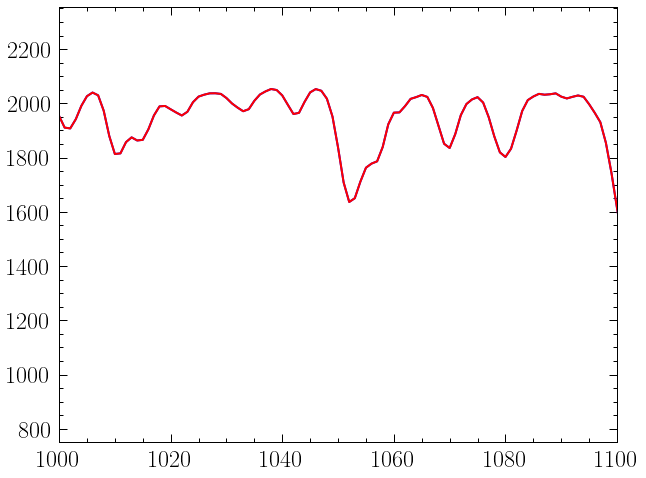

In [63]:
plt.figure(figsize=[10,8])
plt.plot(np.arange(8575), data[0,:],'b')
plt.plot(np.arange(8575)[bitmask[0]==0], data[0,bitmask[0]==0],'r')
plt.xlim([1000,1100])
plt.show()

In [67]:
print(noise[0,1000:1100])
print(bitmask[0,1000:1100])
print(bitmask[0,1000:1100])

[4.09419876 4.09227851 4.04864471 4.08854729 4.14720125 4.15751703
 4.18826951 4.19204026 4.14200283 4.09480813 4.20329347 4.21281743
 4.16618882 4.30717827 4.30593513 4.1691103  4.17230254 4.20059854
 4.17902273 4.16782691 4.19513041 4.19083687 4.19826985 4.24873003
 4.35164154 4.45718879 4.48455385 4.49859874 4.49306895 4.45956581
 4.3825219  4.29862904 4.18465307 4.13017639 4.124902   4.12673922
 4.13575532 4.13132844 4.14562132 4.15212918 4.1025939  4.08363228
 4.0656681  4.11131741 4.24066112 4.28817599 4.46041037 4.71723264
 4.74210506 4.68917829 4.64591486 4.50580417 4.44397822 4.44892404
 4.52686459 4.62298327 4.60172704 4.61149826 4.70116937 4.7683305
 4.8141604  5.15055635 5.25315225 4.93305347 4.80071612 4.7183845
 4.68666241 4.43345371 4.14083821 4.03787325 3.98109427 4.0169323
 4.06168404 4.12291164 4.16405357 4.27769341 4.40827268 4.40647591
 4.32995086 4.31125753 4.31251227 4.34252519 4.41350397 4.50645241
 4.62058001 4.68691266 4.90966356 5.61330747 5.61461378 5.4256715

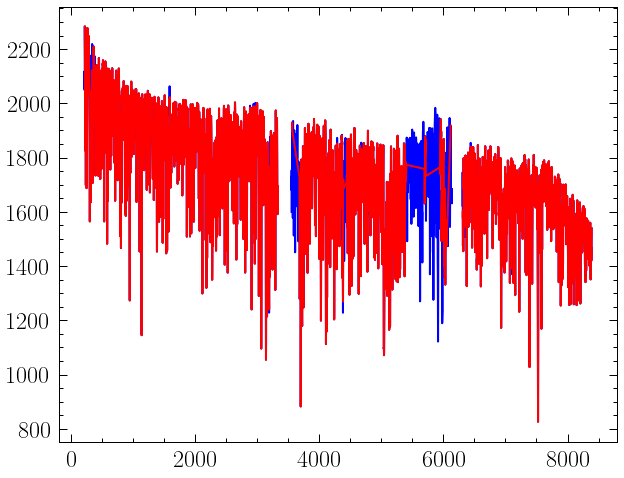

In [62]:
plt.figure(figsize=[10,8])
plt.plot(np.arange(8575), data[0,:],'b')
plt.plot(np.arange(8575)[bitmask[0]==0], data[0,bitmask[0]==0],'r')
plt.show()

In [65]:
print(data[0,5000:5050])

[1807.84640215 1800.78391951 1775.76647459 1773.55303322 1777.28163182
 1769.54925303 1753.06043949 1716.53096926 1706.06581412 1739.94900447
 1760.54079331 1750.47597728 1704.36286181 1596.08363396 1470.14520321
 1406.3617845  1417.14418512 1471.81154969 1517.84310117 1513.78354064
 1503.15711207 1553.63446929 1656.92053852 1740.52971129 1769.28401832
 1766.33755082 1761.02692949 1777.13522111 1813.15576527 1842.72582203
 1846.03318783 1842.77210982 1831.35151763 1780.15707866 1671.73780423
 1499.58476037 1299.58994253 1150.56147815 1095.07340645 1099.21594839
 1096.24217577 1076.78073958 1071.0845861  1085.36515165 1133.69145616
 1225.29307274 1316.66553688 1362.09966997 1371.90851216 1391.01047319]


In [66]:
print(noise[0,5000:5050])

[3.87703791 4.00406954 4.07513508 4.162717   4.35426194 4.48940274
 4.52958191 4.52976239 4.56924215 4.56834609 4.59323996 4.59302573
 4.56243491 4.42591163 4.27921894 4.18988461 4.18559752 4.22869429
 4.27657389 4.29025295 4.27899112 4.23293853 4.14335615 4.12119056
 4.01538121 3.7891334  3.60259428 3.56768397 3.47572187 3.49615467
 3.49405184 3.48122397 3.47007537 3.41656804 3.30558083 3.15052067
 2.97404439 2.83220038 2.76342952 2.75468242 2.74691195 2.73088617
 2.72654765 2.74651539 2.80072082 2.90020949 2.99457518 3.03636593
 3.0586132  3.09603335]
